# Decision Tree Example
Decision tree is a supervised machine learning classifier.

## Create Data

,x,y,labels
0,-1.214649,-1.400439,0.0
1,0.616247,0.088779,0.0
2,-0.129316,0.607831,0.0
3,9.750181,8.370971,1.0
4,-0.773495,-0.514516,0.0
...,...,...,...
195,-1.244222,0.103253,0.0
196,8.826515,11.864074,1.0
197,-0.532754,0.489999,0.0
198,9.486620,11.086205,1.0


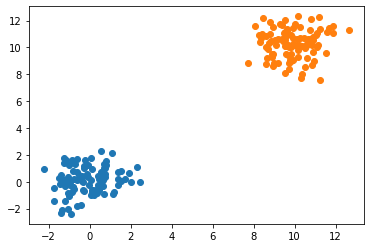

In [26]:
import numpy as np
import pandas as pd

# Create Class a with mean=0, stddev=1
a = np.random.normal(loc=0,scale=1,size=(100,2))
# Create Class a with mean=10, stddev=1
b = np.random.normal(loc=10,scale=1,size=(100,2))
# Add class a label
a = np.concatenate((a,np.zeros((100,1))),axis=1)
# Add class b label
b = np.concatenate((b,np.zeros((100,1))+1),axis=1)
# c is all data together
c = np.concatenate((a,b))
# shuffle data
np.random.shuffle(c)
# make into dataframe for people that give 75s on exams
df = pd.DataFrame(c,columns=['x','y','labels'])
display(df)
feature_cols = ['x','y']
X = df[feature_cols]
y = df['labels']
import matplotlib.pyplot as plt
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

In [17]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [19]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())